#  PROJECT 1  -  Tobacco Use  (Smoke & Smokeless)

* Tobacco use is one of the leading causes of preventable diseases and deaths in the United States


### ----Data Cleanup & Exploration----

In [41]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# BRFSS DataFile to Load
filename  = "BRFSS_Data.csv"

# Read the complete BRFSS data and extract only Tobacco related rows and output those rows to csv file
''' 
BRFSS_Data = pd.read_csv(filename)
BRFSS_Tobacco_Data = BRFSS_Data.loc[BRFSS_Data['Class'] == 'Tobacco Use', :]
BRFSS_Tobacco_Data.to_csv('BRFSS_Tobacco_Data.csv')
'''

# Reading new tobacco file
filename_tobacco = "BRFSS_Tobacco_Data.csv"
BRFSS_Tobacco_Data = pd.read_csv(filename_tobacco)

# Use later
BRFSS_Tobacco_DF = BRFSS_Tobacco_Data

# Filtering out 2018 data
BRFSS_Tobacco_Data = BRFSS_Tobacco_Data.loc[BRFSS_Tobacco_Data['Year'] == 2018 , :]

# Deleting no-use columns
BRFSS_Tobacco_Data = BRFSS_Tobacco_Data[['Year', 'Locationabbr', 'Locationdesc', 'Class', 'Topic',
       'Question', 'Response', 'Break_Out', 'Break_Out_Category','Sample_Size', 'Data_value']]


In [42]:
# Function to remove unnecessary data from dataset

def clean_data(df):
    df = df.loc[ df['Locationdesc'].str.len() < 20 , : ]
    df = df.loc[df['Locationdesc'] != 'Puerto Rico', :]
    df = df.loc[df['Locationdesc'] != 'Guam', :]
    return df


## ---- Percentage of tobacco users per state - 2018 ----

In [43]:
'''All Users Data (Tobacco and Non Tobacco Users)'''

# Tobacco & Non-Tobacco (All) Users Data from year 2018 
Complete_Users_Data_2018_DF = BRFSS_Tobacco_Data.loc[(BRFSS_Tobacco_Data['Topic'] == 'Current Smoker Status')  | (BRFSS_Tobacco_Data['Topic'] == 'Smokeless Tobacco') , :]

# Filtering out no-use states (DC and Territories) in 'Locationdesc' field from All Users Data
Complete_Users_Data_2018_DF_New = clean_data(Complete_Users_Data_2018_DF)

# Groupby States (Locationdesc) - All Users
Total_Users_Count_USA = Complete_Users_Data_2018_DF_New.groupby('Locationdesc').sum()['Data_value']
#Total_Users_Count_USA


'''Tobacco Users Data'''

# Tobacco Users Data from year 2018 (Smoking and Smokeless)
Complete_Tobacco_Users_Data_2018_DF = BRFSS_Tobacco_Data.loc[BRFSS_Tobacco_Data['Response'].isin(['Yes','Every day','Some days']) , :]

# Filtering out no-use states (DC and Territories) in 'Locationdesc' field from Tobacco Users data
Complete_Tobacco_Users_Data_2018_DF_New = clean_data(Complete_Tobacco_Users_Data_2018_DF)  # calling function

# Groupby States (Locationdesc) - Tobacco Users
Total_Tobacco_Users_Count_USA = Complete_Tobacco_Users_Data_2018_DF_New.groupby('Locationdesc').sum()['Data_value']

# Groupby States (Locationdesc) - Tobacco Users - based on 'States Abbr'
Total_Tobacco_Users_Count_USA_Abbr = Complete_Tobacco_Users_Data_2018_DF_New.groupby('Locationabbr').sum()['Data_value']
Total_Tobacco_Users_Count_USA_Abbr_Reset = Total_Tobacco_Users_Count_USA_Abbr.reset_index()

# Percentage of tobacco users all over USA
Percentage_Tobacco_Users = ( Total_Tobacco_Users_Count_USA / Total_Users_Count_USA ) * 100

# Summary - Numerical Analysis
print('''SUMMARY : 

{0}'''.format(Percentage_Tobacco_Users))

SUMMARY : 

Locationdesc
Alabama           13.054670
Alaska            11.490330
Arizona            7.158283
Arkansas          14.185579
California         6.737237
Colorado           9.363285
Connecticut        7.004363
Delaware           8.967318
Florida            8.173313
Georgia           10.300574
Hawaii             8.224870
Idaho              8.578351
Illinois           8.970698
Indiana           12.235955
Iowa              11.332296
Kansas            12.152268
Kentucky          14.737542
Louisiana         11.496010
Maine             10.769903
Maryland           7.598288
Massachusetts      7.384893
Michigan          11.165861
Minnesota         10.452293
Mississippi       13.523645
Missouri          12.244833
Montana           12.788408
Nebraska          11.147511
Nevada             8.559495
New Hampshire      8.259890
New Jersey         7.089124
New Mexico         8.847218
New York           7.665966
North Carolina    10.272898
North Dakota      13.667540
Ohio              12.23

<IPython.core.display.Javascript object>


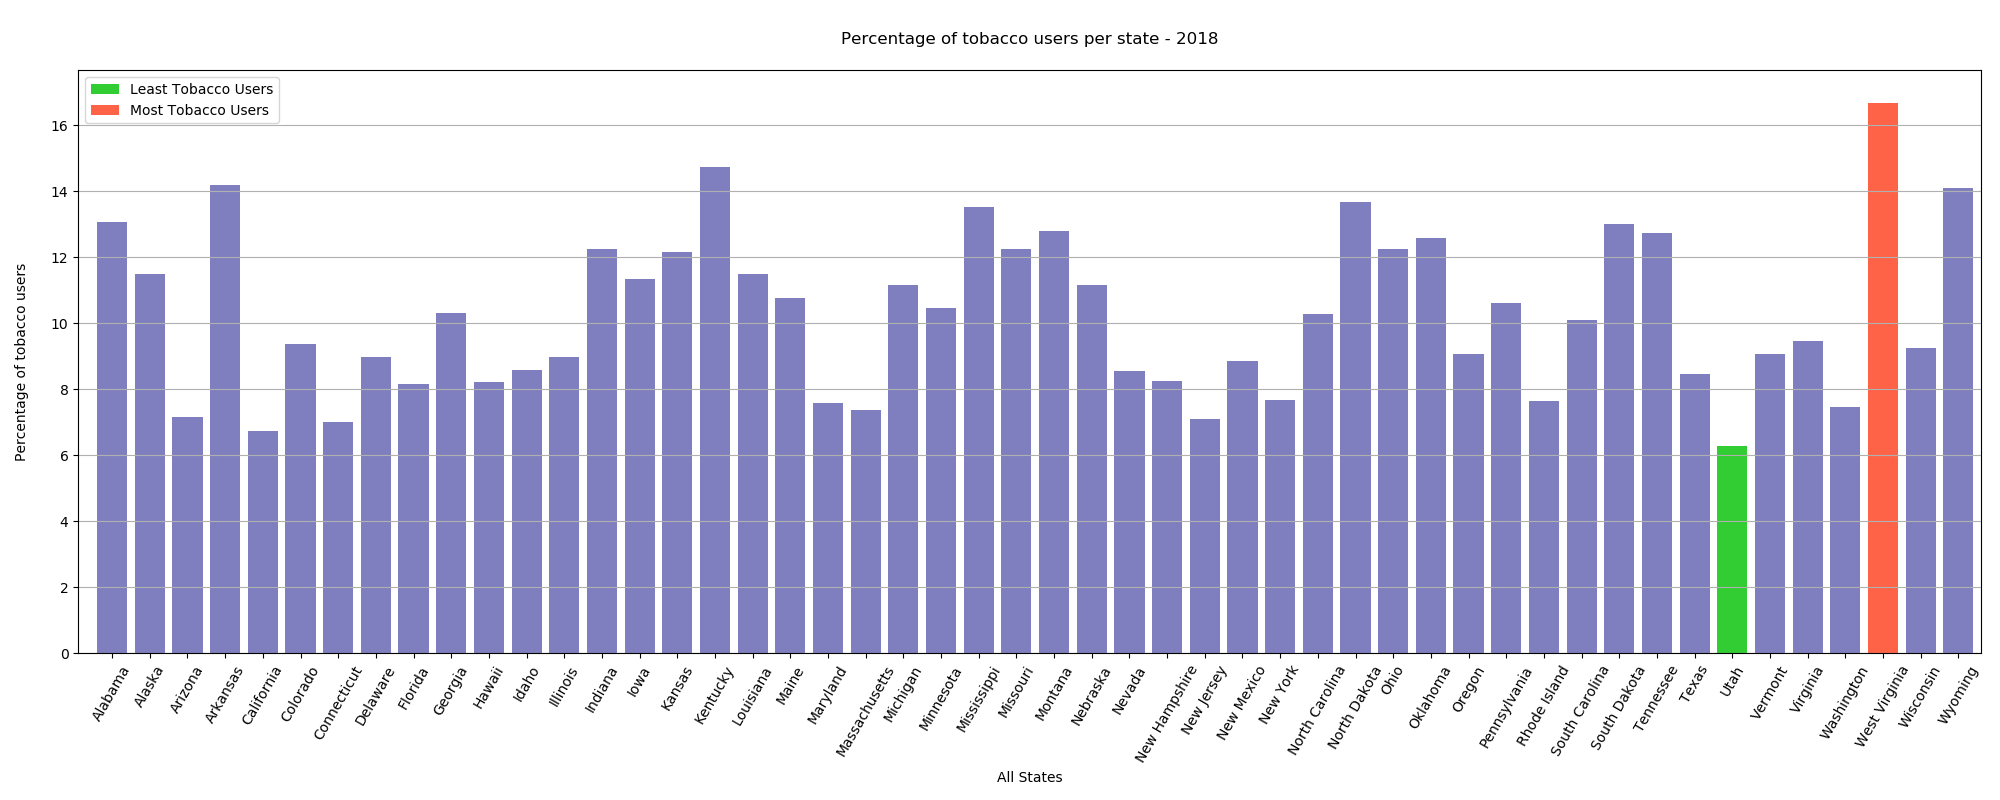

In [52]:
''' Generate a bar plot (chart) showing percentage of tobacco users in all states of USA for the year of 2018 '''

Percentage_Tobacco_Users_Reset = Percentage_Tobacco_Users.reset_index()
States = Percentage_Tobacco_Users_Reset['Locationdesc']

# Set figure size to adjust for space
plt.figure(figsize=(20,8))

# Set x axis, y axis and tick locations
x_axis = np.arange(0,len(States),1)
y_axis = Percentage_Tobacco_Users
tick_locations = [value+0.4 for value in x_axis]

# Set a Title and labels
plt.xlabel("All States")
plt.ylabel("Percentage of tobacco users\n")
plt.title('\nPercentage of tobacco users per state - 2018\n')

# Set x and y limits
plt.xlim(-0.50, len(x_axis))
plt.ylim(0, max(y_axis)+ 1)


''' Change colors of bars of most and least tobacco users '''

# Finding min & max of pecentage of tobacco users
Pmax = max(Percentage_Tobacco_Users)
Pmin = min(Percentage_Tobacco_Users)

# To make series a list 
Percentage_Tobacco_Users_List = Percentage_Tobacco_Users
Percentage_Tobacco_Users_List = Percentage_Tobacco_Users_List.tolist()

# Finding the index location of bars
for each in Percentage_Tobacco_Users_List:
    if each == Pmax:
        max_index = Percentage_Tobacco_Users_List.index(each)
    elif each == Pmin:
        min_index = Percentage_Tobacco_Users_List.index(each)
        
# The Most and least Tobacco Users bars   
bars1 = [min(Percentage_Tobacco_Users)]
bars2 = [max(Percentage_Tobacco_Users)]
 
# The X position of bars
r1 = [min_index + 0.4]
r2 = [max_index + 0.4]
 
# Create barplot
plt.bar( x_axis, y_axis , color='navy', alpha=0.5, align="edge")
plt.xticks(tick_locations, States , rotation=60)
plt.bar(r1, bars1, color = 'limegreen', label='Least Tobacco Users')
plt.bar(r2, bars2, color = 'tomato', label='Most Tobacco Users')


# Create legend
plt.legend()

# Creating the horizontal lines
ax = plt.axes()        
ax.yaxis.grid() 

# Save our graph and show the bar chart
#plt.savefig("Percentage_tobacco_users_per_state.png")
plt.tight_layout()
plt.show()


## ---- Distribution of Male vs Female Tobacco Users (USA) - 2018 ----

SUMMARY : 
Break_Out
Female     773.11
Male      1300.06
Name: Data_value, dtype: float64


<IPython.core.display.Javascript object>


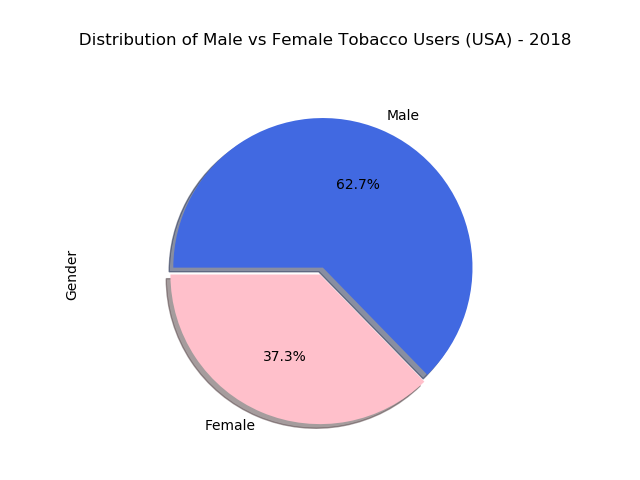

In [53]:
''' Generate a pie chart showing percentage of Male vs Female tobacco users in USA for the year of 2018 '''

# Filtering out Gender based data from complete data set
Tobacco_Gender_Data_2018 = Complete_Tobacco_Users_Data_2018_DF_New.loc[ (Complete_Tobacco_Users_Data_2018_DF_New['Break_Out'] == 'Female') | (Complete_Tobacco_Users_Data_2018_DF_New['Break_Out'] == 'Male') , :]

# Calculating total Male vs Female tobacco users for year 2018 (USA)
Tobacco_Gender_Data_2018_Grouped = Tobacco_Gender_Data_2018.groupby('Break_Out').sum()['Data_value']

Gender_analysis = Tobacco_Gender_Data_2018_Grouped.reset_index()
print('''SUMMARY : 
{0}'''.format(Tobacco_Gender_Data_2018_Grouped))

# Labels, colors
labels = ['Female','Male']
explode = [0,0.05]
colors = ['pink','royalblue']

# Plotting pie chart
%matplotlib notebook
tobacco_gender = Tobacco_Gender_Data_2018_Grouped.plot(kind="pie", shadow=True, explode=explode, autopct="%1.1f%%", startangle= 180, colors=colors, title = "\n   Distribution of Male vs Female Tobacco Users (USA) - 2018 \n\n")
tobacco_gender.set_ylabel('Gender\n\n\n')

# Save our graph and show the bar chart
plt.savefig("Distribution_Male_Female_Tobacco_Users_2018.png")
plt.tight_layout()
plt.show()


## ---- Percentage of Former vs Current Smokers in USA for year 2018 ----

SUMMARY :
Percentage of Former Smokers : 18.75 %
Percenatge of Current Smokers : 14.47 %


<IPython.core.display.Javascript object>


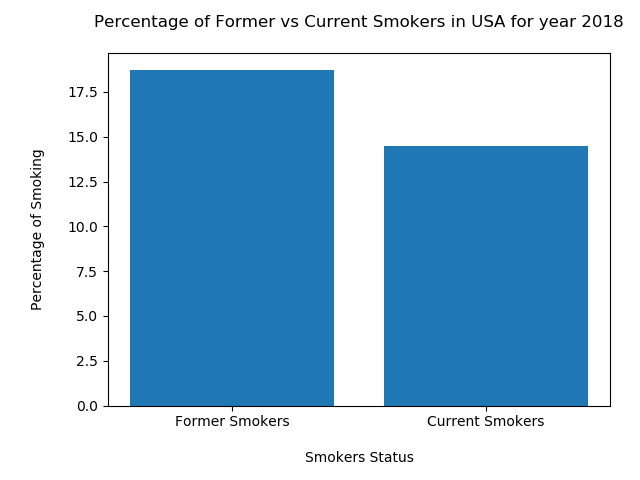

In [54]:
''' Former & Current Smokers in USA for year 2018 '''

# Fetching the Former smoker data
Former_2018_DF = BRFSS_Tobacco_Data.loc[(BRFSS_Tobacco_Data['Response'] == 'Former smoker') , :]

# Filtering out no-use states (DC and Territories) in 'Locationdesc' field from Tobacco Users data
Former_2018_DF_New = clean_data(Former_2018_DF)

# Drop No-Value rows
Former_2018_DF_New = Former_2018_DF_New.dropna(how="any")

# Total Tobacco Users ( Current & Former )
BRFSS_Tobacco_Data_New = clean_data(BRFSS_Tobacco_Data)
BRFSS_Tobacco_Data_Total = BRFSS_Tobacco_Data_New.loc[BRFSS_Tobacco_Data['Response'].isin(['No', 'Yes', 'Former smoker']) , :]
Total_Users_Count_USA = BRFSS_Tobacco_Data_Total.groupby('Locationdesc').sum()['Data_value']
Total_Users_reset = Total_Users_Count_USA.reset_index()
Total_Users = Total_Users_reset['Data_value'].sum()

# Former Smokers
Former_2018_DF_grouped = Former_2018_DF_New.groupby('Locationdesc').sum()['Data_value']
Former_2018_DF_grouped_reset = Former_2018_DF_grouped.reset_index()
Former_count = Former_2018_DF_grouped_reset['Data_value'].sum()
Percent_Former_Smokers_USA = round(( Former_count / Total_Users ) * 100,2)

# Current Smokers
BRFSS_Tobacco_Users_Only = BRFSS_Tobacco_Data_Total.loc[BRFSS_Tobacco_Data_Total['Response'].isin(['Yes']) , :]
Total_Current_Users_Count = BRFSS_Tobacco_Users_Only.groupby('Locationdesc').sum()['Data_value']
Total_Current_Users_Count_reset = Total_Current_Users_Count.reset_index()
Current_Users = Total_Current_Users_Count_reset['Data_value'].sum()

# Percent of current & former smokers
Percent_Current_Users = round((Current_Users / Total_Users ) * 100,2)
percent = [Percent_Former_Smokers_USA , Percent_Current_Users ]
print('''SUMMARY :
Percentage of Former Smokers : {0} %
Percenatge of Current Smokers : {1} %'''.format(Percent_Former_Smokers_USA, Percent_Current_Users))


# Plotting bar chart
x = [0,1]
labels = ['Former Smokers', 'Current Smokers']
y = percent

%matplotlib notebook

plt.bar(x, y)
plt.xticks(x,labels)
plt.title('Percentage of Former vs Current Smokers in USA for year 2018\n')
plt.xlabel("\nSmokers Status")
plt.ylabel('\nPercentage of Smoking\n')
plt.tight_layout()

# Save our graph and show the bar chart
plt.savefig("Percentage_Current_Former_Smokers_2018.png")
plt.tight_layout()
plt.show()


# Research Question - 1 (Findings Summary) :

## Percentage of tobacco users across USA

* Based on research & data analysis, we found out that West Virginia (WV) has highest number of tobacco users (approx. 16.66%) and Utah(UT) has least number of tobacco users (approx. 6.27%)

* Then, we found out that tobacco usage is not uniform across gender. Adult males(62.7%) were significantly more likely to use tobacco than females(37.3%).    

* Tobacco use (Smoke & Smokeless) has declined from 18.75% (nearly 19 of every 100 adults) to 14.47% (14 of every 100 adults) in the year 2018 across USA.



## ----Correlation between household income level and tobacco use----

for this income range: Less than $15,000 the percentage of tobacco users is: 13.054670423722115
for this income range: $15,000-$24,999 the percentage of tobacco users is: 11.49032967645527
for this income range: $25,000-$34,999 the percentage of tobacco users is: 7.158283348546092
for this income range: $35,000-$49,999 the percentage of tobacco users is: 14.185579008622968
for this income range: $50,000+ the percentage of tobacco users is: 6.737237493597405


<IPython.core.display.Javascript object>


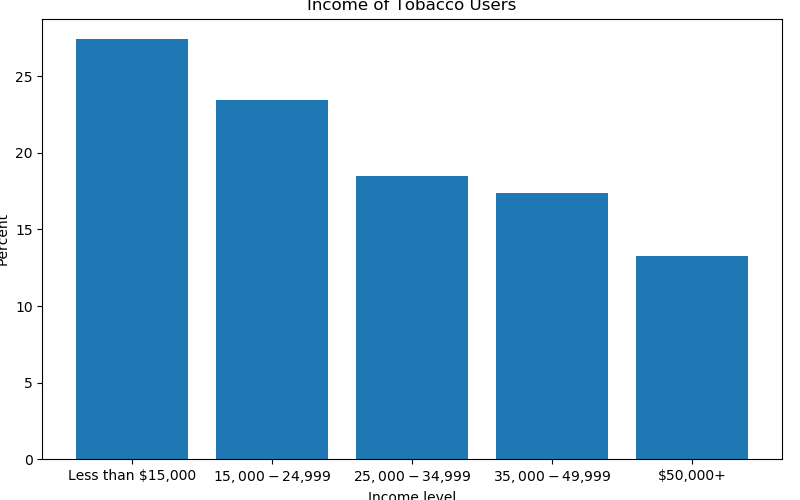

In [55]:
#Create Dataframe to only show household income in year 2018 for all states
Complete_Tobacco_Users_Data_2018_DF_New_HC = Complete_Tobacco_Users_Data_2018_DF_New[(Complete_Tobacco_Users_Data_2018_DF_New.Year == 2018) & (Complete_Tobacco_Users_Data_2018_DF_New.Break_Out_Category == 'Household Income')]

#Isolate data to manipulate it in future between all income levels
household_inc = Complete_Tobacco_Users_Data_2018_DF_New[Complete_Tobacco_Users_Data_2018_DF_New.Break_Out == 'Less than $15,000']
household_inc2 = Complete_Tobacco_Users_Data_2018_DF_New[Complete_Tobacco_Users_Data_2018_DF_New.Break_Out == '$15,000-$24,999']
household_inc3 = Complete_Tobacco_Users_Data_2018_DF_New[Complete_Tobacco_Users_Data_2018_DF_New.Break_Out == '$25,000-$34,999']
household_inc4 = Complete_Tobacco_Users_Data_2018_DF_New[Complete_Tobacco_Users_Data_2018_DF_New.Break_Out == '$35,000-$49,999']
household_inc5 = Complete_Tobacco_Users_Data_2018_DF_New[Complete_Tobacco_Users_Data_2018_DF_New.Break_Out == '$50,000+']

#Add all data values for each income levels
Data15 = household_inc['Data_value'].sum()
Data25 = household_inc2['Data_value'].sum()
Data35 = household_inc3['Data_value'].sum()
Data49 = household_inc4['Data_value'].sum()
Data50 = household_inc5['Data_value'].sum()

#Convert data value sums into percentages to show percentages
Data = Data15 + Data25  + Data35 + Data49 + Data50

Percent15 = (Data15/Data)* 100
Percent25 = (Data25/Data)* 100
Percent35 = (Data35/Data)* 100
Percent49 = (Data49/Data)* 100
Percent50 = (Data50/Data)* 100

#Filter income by data values
income = Complete_Tobacco_Users_Data_2018_DF_New_HC['Data_value']

#create a list that will show all of the data values and income levels
income_list = [Data15, Data25, Data35, Data49, Data50]

#Filter income level by break out column
income_level = Complete_Tobacco_Users_Data_2018_DF_New_HC['Break_Out']

#List of labels for each income level
labels = ["Less than $15,000", "$15,000-$24,999", "$25,000-$34,999", "$35,000-$49,999", "$50,000+"]

#Show for each income range/level the amount of tobacco users in percenrtage
for i in range(0,5):
    print(f'for this income range: {labels[i]} the percentage of tobacco users is: {y_axis[i]}')
    

#Create a bar graph showing the percentage of tobacco users and their income level
x_axis = np.arange(0, len(labels), 1)
y_axis = [Percent15, Percent25, Percent35, Percent49, Percent50]
plt.figure(figsize=(8,5))
plt.bar(x_axis, y_axis)
plt.xticks(x_axis, labels)
plt.tight_layout()
plt.title("\nIncome of Tobacco Users")
plt.xlabel("Income level")
plt.ylabel("Percent")
plt.savefig("Income_of_Tobacco_Users.png")    
    


In [27]:
#For each income level/range the amount in numbers of the tobacco users
for i in range(0,5):
    print(f'for this income range: {labels[i]} the number of tobacco users is: {round(income_list[i], 0)}')

for this income range: Less than $15,000 the number of tobacco users is: 1606.0
for this income range: $15,000-$24,999 the number of tobacco users is: 1374.0
for this income range: $25,000-$34,999 the number of tobacco users is: 1084.0
for this income range: $35,000-$49,999 the number of tobacco users is: 1020.0
for this income range: $50,000+ the number of tobacco users is: 778.0


<IPython.core.display.Javascript object>


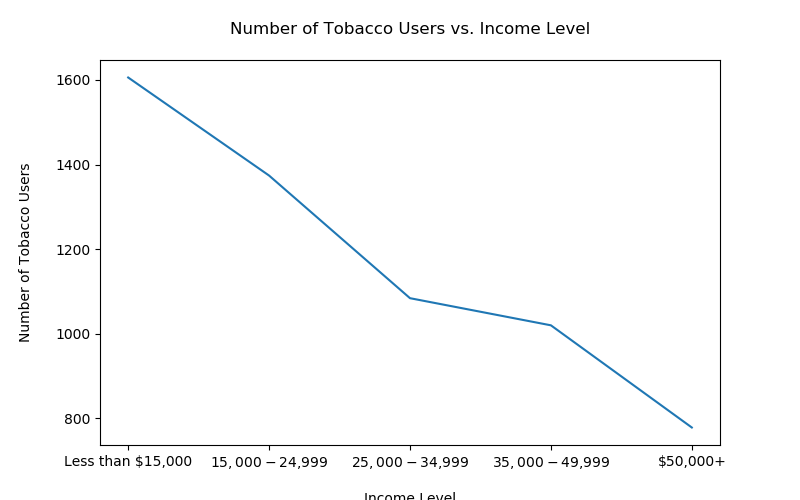

In [56]:
#Create line graph showing the number of users vs their income level
%matplotlib notebook
plt.figure(figsize=(8,5))
plt.plot(labels, income_list)
plt.title('\nNumber of Tobacco Users vs. Income Level\n')
plt.xlabel('\nIncome Level\n')
plt.ylabel('\nNumber of Tobacco Users\n')
plt.savefig("Tobacco_Users_vs_Income_Level.png")
plt.show()

In [10]:
#new list of income level
labels1 = [10000, 15000, 25000, 35000, 50000]

#find the correlation between tobacco users and income level
correlation = st.pearsonr( labels1 , income_list )
print(f"\nThe correlation between the number of tobacco users and the income level is {round(correlation[0],2)} \n")


The correlation between the number of tobacco users and the income level is -0.96 



# Research Question 2 (Findings Summary) - 

## Does the income level lead to an increase or decrease in tobacco usage?
Based on the findings for 2018 there is a strong (negative) correlation between the number of tobacco users and their income. The findings per the research and data gathered, shows that the number and percentage of the majority of the people who use tobacco tend to have a lower income level compared to those with a higher income level. As shown in the bar graph above more than 25 percent of the people with an income less than 15,000 dollars expressed to use or have used tobacco. The data analysis also shows that less than 15 percent of the tobacco users had an income level of 50,000 or more which is the least amongst the data that was provided.

## ----- Tobacco Usage vs Education Level----

In [49]:
#Create Dataframe to only show Education Attained in year 2018 for all states
Education_Attained_DF = Complete_Tobacco_Users_Data_2018_DF_New[(Complete_Tobacco_Users_Data_2018_DF_New.Year == 2018) & (Complete_Tobacco_Users_Data_2018_DF_New.Break_Out_Category == 'Education Attained')]

#Filter Different Education levels 
education_level1 = Complete_Tobacco_Users_Data_2018_DF_New[Complete_Tobacco_Users_Data_2018_DF_New.Break_Out == 'Less than H.S.']
education_level2 = Complete_Tobacco_Users_Data_2018_DF_New[Complete_Tobacco_Users_Data_2018_DF_New.Break_Out == 'H.S. or G.E.D.']
education_level3 = Complete_Tobacco_Users_Data_2018_DF_New[Complete_Tobacco_Users_Data_2018_DF_New.Break_Out == 'Some post-H.S.']
education_level4 = Complete_Tobacco_Users_Data_2018_DF_New[Complete_Tobacco_Users_Data_2018_DF_New.Break_Out == 'College graduate']

#Sum of each data value for the education levels
Data_Value_sum1 = education_level1['Data_value'].sum()
Data_Value_sum2 = education_level2['Data_value'].sum()
Data_Value_sum3 = education_level3['Data_value'].sum()
Data_Value_sum4 = education_level4['Data_value'].sum()

#Convert data value sums into percentages to show percentages
Total_Sum_Data = Data_Value_sum1 + Data_Value_sum2  + Data_Value_sum3 + Data_Value_sum4 

Edu_percent1 = (Data_Value_sum1/Total_Sum_Data)* 100
Edu_percent2 = (Data_Value_sum2/Total_Sum_Data)* 100
Edu_percent3 = (Data_Value_sum3/Total_Sum_Data)* 100
Edu_percent4 = (Data_Value_sum4/Total_Sum_Data)* 100

#Filter income by data values
education = Education_Attained_DF['Data_value']

#create a list that will show all of the data values and income levels
education_list = [Data_Value_sum1, Data_Value_sum2, Data_Value_sum3, Data_Value_sum4]

#Filter education level by break out column
education_level = Education_Attained_DF['Break_Out']

#List of labels for each education level
labels = ["Less than H.S.", "H.S. or G.E.D.", "Some post-H.S.", "College graduate"]
y_axis = [Edu_percent1, Edu_percent2, Edu_percent3, Edu_percent4]


#Percentage of Tabocco users versus education level.
for i in range(0,4):
    print(f'When Education Level is: {labels[i]} Then the Percentage of Tobacco Users are: {y_axis[i]} %')
    

When Education Level is: Less than H.S. Then the Percentage of Tobacco Users are: 36.64187453243071 %
When Education Level is: H.S. or G.E.D. Then the Percentage of Tobacco Users are: 30.421801826122557 %
When Education Level is: Some post-H.S. Then the Percentage of Tobacco Users are: 22.962427448118397 %
When Education Level is: College graduate Then the Percentage of Tobacco Users are: 9.973896193328317 %


<IPython.core.display.Javascript object>


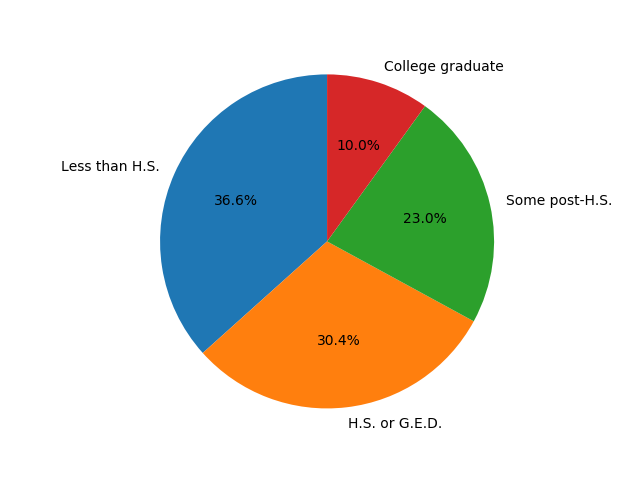

In [50]:
# Pie Plot showing the percentage of Tobacoo users and thier Education level

labels = ['Less than H.S.', 'H.S. or G.E.D.', 'Some post-H.S.', 'College graduate']
sizes = [36.64187453243071, 30.421801826122557, 22.962427448118397, 9.973896193328317]  
 
# Plot the pie chart
%matplotlib notebook
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
 
# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')
 
# Display the graph onto the screen

plt.show()

In [33]:
#For Education Level for ther Number of Tobacco Users
for i in range(0,4):
    print(f'When the Education Level is: {labels[i]} then the number of Tobacco Users are: {round(education_list[i], 0)}')
    
    

When the Education Level is: Less than H.S. then the number of Tobacco Users are: 1602.0
When the Education Level is: H.S. or G.E.D. then the number of Tobacco Users are: 1330.0
When the Education Level is: Some post-H.S. then the number of Tobacco Users are: 1004.0
When the Education Level is: College graduate then the number of Tobacco Users are: 436.0


<IPython.core.display.Javascript object>


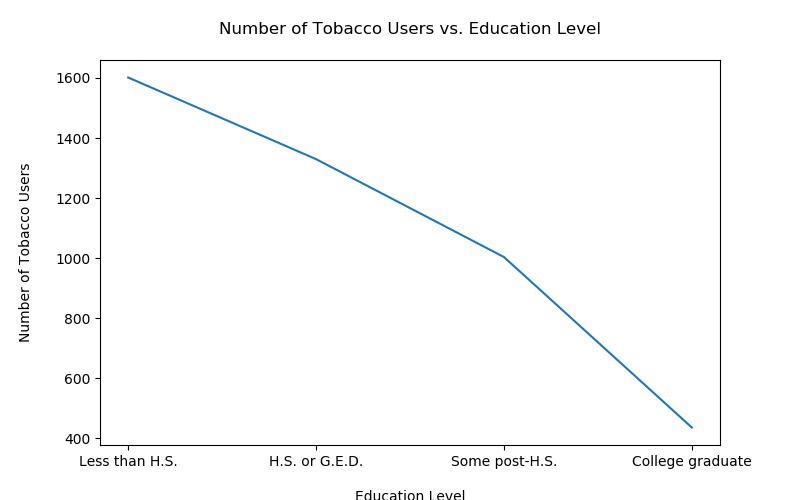

In [51]:
#Create line graph showing the number of tobacco users vs their education level
plt.figure(figsize=(8,5))
plt.plot(labels, education_list)
plt.title('\nNumber of Tobacco Users vs. Education Level\n')
plt.xlabel('\nEducation Level\n')
plt.ylabel('\nNumber of Tobacco Users\n')
plt.savefig("Tobacco_Users_vs_Education_Level.png")
plt.show()

# # Research Question 3 (Findings Summary) - 
## Is the Usage of Tobacco dependant on the Education Level of the consumer?
Based on the findings for 2018 there is a correlation between the number of tobacco users and their education levels. The findings per the research and data gathered, shows that the number and percentage of the Tobacco consumser reduces with the level of education. As shown in the Pie chart more 67% of the Tobacco Users have a High School Education or less than High School Education. 33% of the the Tobacco Users had Some Post High School or College Degree. 